# Import statements
Following packages are necessary:

In [1]:
import random
import utils
import os
import imageio
import json
from simplegen import SIMPLESequence

import tensorflow as tf
import numpy as np
import tensorflow.keras.backend as kb
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint

from unet import UNet
from unet import preprocess_input as pre_une

from matplotlib import pyplot as plt

# Checks
The version of tensorflow as well as the GPU support are checked.

In [2]:
print(tf.__version__)
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.experimental.get_visible_devices('GPU')

2.0.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Functionality
Necessary funcionality is added here

In [3]:
def plot_cube(img, x, y, val):
    
    img[y][x] = val
    img[y][x-1] = val
    img[y][x+1] = val
    img[y-1][x] = val
    img[y-1][x-1] = val
    img[y-1][x+1] = val
    img[y+1][x] = val
    img[y+1][x-1] = val
    img[y+1][x+1] = val  

# 6.8) Supervised Euclidean for SIMPLED with fixed image
A U-Net is trained here to predict a displacement field and the euclidean distance is taken as error.

# Data
Import training images

In [4]:
store_path = 'experiments/6_8_euclidean'

path_fixed = r'D:\Julian\data\SIMPLED\train\0'
path_train = r'D:\Julian\data\SIMPLED\train'
path_validation = r'D:\Julian\data\SIMPLED\validation'
path_test = r'D:\Julian\data\SIMPLED\test'

width = 224
height = 224

# Seeding
Seeds are set to ensure reproducible training.

In [5]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Network
A U-Net based network is instantiated with keras to run a semantic segmentation.

In [6]:
model = UNet(filters=32, layers=4, activation='linear', classes=2, input_shape=(224, 224, 2))

# Training Preparation
Prepare the settings for training the model.

In [7]:
train_gen = SIMPLESequence(path_train, path_fixed,
                           batch_size=4,
                           preprocess_input=pre_une,
                           shuffle=True,
                           multi_channel='fixed')

validation_gen = SIMPLESequence(path_validation, path_fixed,
                                batch_size=4,
                                preprocess_input=pre_une,
                                multi_channel='fixed')

logger = CSVLogger(store_path + "/log")
checker = ModelCheckpoint(store_path + "/weights.{epoch:02d}.hdf5",
                          period=10)
callbacks = [logger, checker]

model.compile(optimizer='adam', loss = utils.msed_loss)

# Training
Run the training.

In [8]:
model.fit(train_gen,
          epochs=100,
          callbacks=callbacks,
          validation_data=validation_gen,
          validation_freq=1,
          #use_multiprocessing=True,
          workers=10,
          max_queue_size=32)

Train for 840 steps, validate for 180 steps
Epoch 1/100


C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shap

840/840 [==============================] - 82s 98ms/step - loss: 722.3557 - val_loss: 609.9671
Epoch 2/100
840/840 [==============================] - 73s 86ms/step - loss: 295.2440 - val_loss: 69.2219
Epoch 3/100
840/840 [==============================] - 71s 84ms/step - loss: 63.9594 - val_loss: 40.3651
Epoch 4/100
840/840 [==============================] - 69s 82ms/step - loss: 43.8902 - val_loss: 134.2030
Epoch 5/100
840/840 [==============================] - 72s 86ms/step - loss: 34.9258 - val_loss: 44.4679
Epoch 6/100
840/840 [==============================] - 72s 86ms/step - loss: 29.1634 - val_loss: 24.8344
Epoch 7/100
840/840 [==============================] - 70s 83ms/step - loss: 26.7894 - val_loss: 35.6561
Epoch 8/100
840/840 [==============================] - 70s 83ms/step - loss: 24.6091 - val_loss: 23.7568
Epoch 9/100
840/840 [==============================] - 69s 82ms/step - loss: 21.0550 - val_loss: 21.3612
Epoch 10/100
840/840 [==============================] - 70s 83m

840/840 [==============================] - 69s 82ms/step - loss: 1.1199 - val_loss: 3.1837
Epoch 80/100
840/840 [==============================] - 69s 82ms/step - loss: 0.8005 - val_loss: 3.2592
Epoch 81/100
840/840 [==============================] - 69s 83ms/step - loss: 0.5610 - val_loss: 3.1302
Epoch 82/100
840/840 [==============================] - 69s 82ms/step - loss: 0.7603 - val_loss: 2.9978
Epoch 83/100
840/840 [==============================] - 70s 83ms/step - loss: 1.2282 - val_loss: 3.9371
Epoch 84/100
840/840 [==============================] - 71s 85ms/step - loss: 0.6977 - val_loss: 2.7065
Epoch 85/100
840/840 [==============================] - 70s 83ms/step - loss: 0.5404 - val_loss: 2.9330
Epoch 86/100
840/840 [==============================] - 69s 83ms/step - loss: 0.6324 - val_loss: 3.4963
Epoch 87/100
840/840 [==============================] - 69s 82ms/step - loss: 0.6906 - val_loss: 2.8284
Epoch 88/100
840/840 [==============================] - 70s 83ms/step - loss:

# Evaluation
Evaluate the trained network

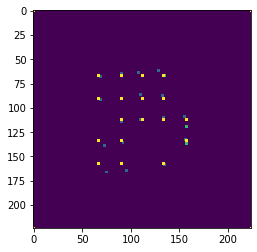

In [9]:
X, y = validation_gen[1]

y_pred = model.predict(X)

u_x = y_pred[0,:,:,0]
u_y = y_pred[0,:,:,1]

plt.imshow(y_pred[0,:,:,0], cmap="gray")

plt.imsave(store_path + "/u_x.png", u_x, cmap="gray")
plt.imsave(store_path + "/u_y.png", u_y, cmap="gray")

u_x.dump(store_path + "/u_x")
u_y.dump(store_path + "/u_y")

warp = np.zeros((width, height))

for index in range(0,25):
    x_pos = int(y[0, index, 0, 0])
    y_pos = int(y[0, index, 1, 0])
    
    plot_cube(warp, x_pos, y_pos, 1) #blue
    
    ux_field = y_pred[0,:,:,0]
    uy_field = y_pred[0,:,:,1]
    
    ux = ux_field[y_pos][x_pos]
    uy = uy_field[y_pos][x_pos]
    
    x_pos = int(round(x_pos + ux))
    y_pos = int(round(y_pos + uy))
            
    plot_cube(warp, x_pos, y_pos, 2) #green    
    
    x_pos = int(y[0, index, 0, 1])
    y_pos = int(y[0, index, 1, 1])
    
    plot_cube(warp, x_pos, y_pos, 3) #yellow    
    
plt.imshow(warp)
plt.imsave(store_path + "/warp.png", warp)

# 6.9) Supervised Euclidean for SIMPLED with difference image
A U-Net is trained here to predict a displacement field and the euclidean distance is taken as error.

# Data
Import training images

In [10]:
store_path = 'experiments/6_9_euclidean'

path_fixed = r'D:\Julian\data\SIMPLED\train\0'
path_train = r'D:\Julian\data\SIMPLED\train'
path_validation = r'D:\Julian\data\SIMPLED\validation'
path_test = r'D:\Julian\data\SIMPLED\test'

width = 224
height = 224

# Seeding
Seeds are set to ensure reproducible training.

In [11]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Network
A U-Net based network is instantiated with keras to run a semantic segmentation.

In [12]:
model = UNet(filters=32, layers=4, activation='linear', classes=2, input_shape=(224, 224, 2))

# Training Preparation
Prepare the settings for training the model.

In [13]:
train_gen = SIMPLESequence(path_train, path_fixed,
                           batch_size=4,
                           preprocess_input=pre_une,
                           shuffle=True,
                           multi_channel='diff')

validation_gen = SIMPLESequence(path_validation, path_fixed,
                                batch_size=4,
                                preprocess_input=pre_une,
                                multi_channel='diff')

logger = CSVLogger(store_path + "/log")
checker = ModelCheckpoint(store_path + "/weights.{epoch:02d}.hdf5",
                          period=10)
callbacks = [logger, checker]

model.compile(optimizer='adam', loss = utils.msed_loss)

In [24]:
X,y = train_gen[0]

In [34]:
X[0,:,:,2]

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

# Training
Run the training.

In [14]:
model.fit(train_gen,
          epochs=100,
          callbacks=callbacks,
          validation_data=validation_gen,
          validation_freq=1,
          #use_multiprocessing=True,
          workers=10,
          max_queue_size=32)

D:\Julian\workspace\endolas\simplegen.py:129: RuntimeWarning: invalid value encountered in true_divide
  image_diff = 255.0 * image_diff / image_diff.max()


Train for 840 steps, validate for 180 steps
Epoch 1/100


C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shap

840/840 [==============================] - 79s 94ms/step - loss: 839.9462 - val_loss: 1154.7513
Epoch 2/100
840/840 [==============================] - 71s 85ms/step - loss: 869.8591 - val_loss: 4064.9566
Epoch 3/100
840/840 [==============================] - 71s 85ms/step - loss: 741.6891 - val_loss: 1843.6055
Epoch 4/100
840/840 [==============================] - 71s 85ms/step - loss: 698.1401 - val_loss: 4865.0217
Epoch 5/100
840/840 [==============================] - 71s 84ms/step - loss: 683.6324 - val_loss: 7445.8121
Epoch 6/100
840/840 [==============================] - 74s 88ms/step - loss: 677.5561 - val_loss: 1462.5711
Epoch 7/100
840/840 [==============================] - 71s 84ms/step - loss: 674.6057 - val_loss: 4304.5708
Epoch 8/100
840/840 [==============================] - 70s 84ms/step - loss: 673.2408 - val_loss: 2507.0141
Epoch 9/100
840/840 [==============================] - 71s 84ms/step - loss: 672.2076 - val_loss: 5259.3942
Epoch 10/100
840/840 [==================

840/840 [==============================] - 73s 86ms/step - loss: 652.6103 - val_loss: 7182.0573
Epoch 77/100
840/840 [==============================] - 70s 83ms/step - loss: 652.6247 - val_loss: 6063.2471
Epoch 78/100
840/840 [==============================] - 75s 90ms/step - loss: 652.0835 - val_loss: 5482.3776
Epoch 79/100
840/840 [==============================] - 71s 85ms/step - loss: 651.9201 - val_loss: 4927.7967
Epoch 80/100
840/840 [==============================] - 74s 88ms/step - loss: 651.3849 - val_loss: 5375.4925
Epoch 81/100
840/840 [==============================] - 72s 85ms/step - loss: 651.4203 - val_loss: 7119.1953
Epoch 82/100
840/840 [==============================] - 71s 85ms/step - loss: 651.0909 - val_loss: 6078.8338
Epoch 83/100
840/840 [==============================] - 72s 85ms/step - loss: 650.5286 - val_loss: 3789.1765
Epoch 84/100
840/840 [==============================] - 71s 84ms/step - loss: 650.9451 - val_loss: 6070.9046
Epoch 85/100
840/840 [==========

# Evaluation
Evaluate the trained network

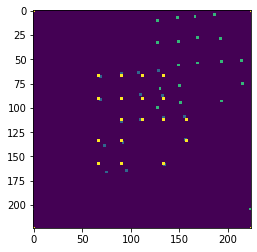

In [15]:
X, y = validation_gen[1]

y_pred = model.predict(X)

u_x = y_pred[0,:,:,0]
u_y = y_pred[0,:,:,1]

plt.imshow(y_pred[0,:,:,0], cmap="gray")

plt.imsave(store_path + "/u_x.png", u_x, cmap="gray")
plt.imsave(store_path + "/u_y.png", u_y, cmap="gray")

u_x.dump(store_path + "/u_x")
u_y.dump(store_path + "/u_y")

warp = np.zeros((width, height))

for index in range(0,25):
    x_pos = int(y[0, index, 0, 0])
    y_pos = int(y[0, index, 1, 0])
    
    plot_cube(warp, x_pos, y_pos, 1) #blue
    
    ux_field = y_pred[0,:,:,0]
    uy_field = y_pred[0,:,:,1]
    
    ux = ux_field[y_pos][x_pos]
    uy = uy_field[y_pos][x_pos]
    
    x_pos = int(round(x_pos + ux))
    y_pos = int(round(y_pos + uy))
            
    plot_cube(warp, x_pos, y_pos, 2) #green    
    
    x_pos = int(y[0, index, 0, 1])
    y_pos = int(y[0, index, 1, 1])
    
    plot_cube(warp, x_pos, y_pos, 3) #yellow    
    
plt.imshow(warp)
plt.imsave(store_path + "/warp.png", warp)

# 6.10) Supervised Euclidean for SIMPLED with difference image and gradient
A U-Net is trained here to predict a displacement field and the euclidean distance is taken as error.

# Data
Import training images

In [16]:
store_path = 'experiments/6_10_euclidean'

path_fixed = r'D:\Julian\data\SIMPLED\train\0'
path_train = r'D:\Julian\data\SIMPLED\train'
path_validation = r'D:\Julian\data\SIMPLED\validation'
path_test = r'D:\Julian\data\SIMPLED\test'

width = 224
height = 224

# Seeding
Seeds are set to ensure reproducible training.

In [17]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Network
A U-Net based network is instantiated with keras to run a semantic segmentation.

In [18]:
model = UNet(filters=32, layers=4, activation='linear', classes=2, input_shape=(224, 224, 3))

# Training Preparation
Prepare the settings for training the model.

In [19]:
train_gen = SIMPLESequence(path_train, path_fixed,
                           batch_size=4,
                           preprocess_input=pre_une,
                           shuffle=True,
                           multi_channel='grad')

validation_gen = SIMPLESequence(path_validation, path_fixed,
                                batch_size=4,
                                preprocess_input=pre_une,
                                multi_channel='grad')

logger = CSVLogger(store_path + "/log")
checker = ModelCheckpoint(store_path + "/weights.{epoch:02d}.hdf5",
                          period=10)
callbacks = [logger, checker]

model.compile(optimizer='adam', loss = utils.msed_loss)

# Training
Run the training.

In [20]:
model.fit(train_gen,
          epochs=100,
          callbacks=callbacks,
          validation_data=validation_gen,
          validation_freq=1,
          #use_multiprocessing=True,
          workers=10,
          max_queue_size=32)

D:\Julian\workspace\endolas\simplegen.py:136: RuntimeWarning: invalid value encountered in true_divide
  image_diff = 255.0 * image_diff / image_diff.max()
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\skimage\filters\rank\generic.py:119: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


Train for 840 steps, validate for 180 steps
Epoch 1/100


C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\zilkerjn\AppData\Local\Continuum\anaconda3\envs\glotax\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shap

840/840 [==============================] - 137s 163ms/step - loss: 815.4325 - val_loss: 1250.0230
Epoch 2/100
840/840 [==============================] - 150s 178ms/step - loss: 877.2024 - val_loss: 1919.5403
Epoch 3/100
840/840 [==============================] - 151s 180ms/step - loss: 753.7293 - val_loss: 20131.9531
Epoch 4/100
840/840 [==============================] - 151s 179ms/step - loss: 703.7980 - val_loss: 44238.7665
Epoch 5/100
840/840 [==============================] - 157s 186ms/step - loss: 685.9553 - val_loss: 68452.7398
Epoch 6/100
840/840 [==============================] - 155s 185ms/step - loss: 678.1999 - val_loss: 42379.2052
Epoch 7/100
840/840 [==============================] - 157s 187ms/step - loss: 674.9416 - val_loss: 39023.9318
Epoch 8/100
840/840 [==============================] - 158s 188ms/step - loss: 673.2630 - val_loss: 67738.0150
Epoch 9/100
840/840 [==============================] - 131s 156ms/step - loss: 672.2045 - val_loss: 46857.3610
Epoch 10/100
84

840/840 [==============================] - 150s 179ms/step - loss: 655.2923 - val_loss: 29020.5641
Epoch 75/100
840/840 [==============================] - 149s 178ms/step - loss: 655.0829 - val_loss: 32393.3206
Epoch 76/100
840/840 [==============================] - 151s 179ms/step - loss: 654.9131 - val_loss: 33860.4097
Epoch 77/100
840/840 [==============================] - 155s 185ms/step - loss: 654.8942 - val_loss: 34794.1306
Epoch 78/100
840/840 [==============================] - 151s 180ms/step - loss: 654.4790 - val_loss: 28588.4297
Epoch 79/100
840/840 [==============================] - 151s 180ms/step - loss: 654.1978 - val_loss: 27709.4504
Epoch 80/100
840/840 [==============================] - 153s 182ms/step - loss: 653.8935 - val_loss: 28464.4756
Epoch 81/100
840/840 [==============================] - 155s 184ms/step - loss: 653.9705 - val_loss: 31702.8865
Epoch 82/100
840/840 [==============================] - 152s 181ms/step - loss: 653.7984 - val_loss: 30193.5095
Epoch

# Evaluation
Evaluate the trained network

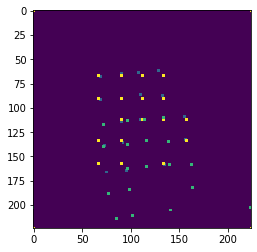

In [21]:
X, y = validation_gen[1]

y_pred = model.predict(X)

u_x = y_pred[0,:,:,0]
u_y = y_pred[0,:,:,1]

plt.imshow(y_pred[0,:,:,0], cmap="gray")

plt.imsave(store_path + "/u_x.png", u_x, cmap="gray")
plt.imsave(store_path + "/u_y.png", u_y, cmap="gray")

u_x.dump(store_path + "/u_x")
u_y.dump(store_path + "/u_y")

warp = np.zeros((width, height))

for index in range(0,25):
    x_pos = int(y[0, index, 0, 0])
    y_pos = int(y[0, index, 1, 0])
    
    plot_cube(warp, x_pos, y_pos, 1) #blue
    
    ux_field = y_pred[0,:,:,0]
    uy_field = y_pred[0,:,:,1]
    
    ux = ux_field[y_pos][x_pos]
    uy = uy_field[y_pos][x_pos]
    
    x_pos = int(round(x_pos + ux))
    y_pos = int(round(y_pos + uy))
            
    plot_cube(warp, x_pos, y_pos, 2) #green    
    
    x_pos = int(y[0, index, 0, 1])
    y_pos = int(y[0, index, 1, 1])
    
    plot_cube(warp, x_pos, y_pos, 3) #yellow    
    
plt.imshow(warp)
plt.imsave(store_path + "/warp.png", warp)